<a href="https://colab.research.google.com/github/SherylPhilip/The-Sparks-Foundation-Internship/blob/main/Task_2_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation GRIP JUNE21**





**Data Science and Business Analytics Internship Tasks**

**Author : Sheryl Philip**

Task 2 : Prediction using Unsupervised ML. From the given ‘Iris’ dataset, predict the optimum number of clusters
 and represent it visually. 

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**Loading the dataset from a csv File.**

In [2]:
iris_df = pd.read_csv(r'/content/drive/MyDrive/Python files/Iris.csv', header= 0)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the repeated variable
iris_df=iris_df.drop(['Id'], axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Explotatory Data Analysis

In [4]:
# Checking the dimension of the data
iris_df.shape

(150, 5)

In [5]:
# Checking the info of the dataset
iris_df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
# Summary statstics
iris_df.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# The datatypes of the Variables
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Checking the missing values in the dataset
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

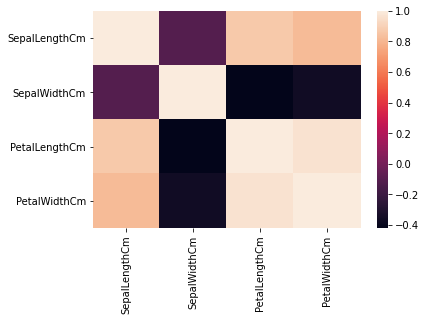

In [9]:
sns.heatmap(iris_df.corr())

**# As we see in the abobe heatmap the petallength and sepalwidth is higly correlated as well as sepalwidth and petallength.**

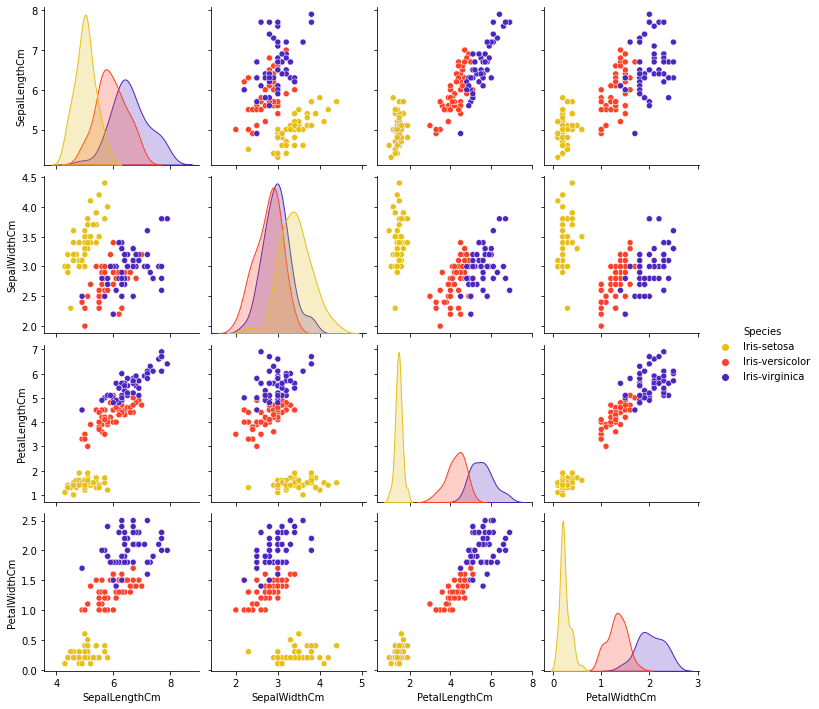

In [10]:
# Pairplot
sns.pairplot(iris_df,hue ='Species',palette = 'CMRmap_r')

# **To find the Optimum number of Clusters**

In [11]:
#Creating array of X for the processing 
X= iris_df.values[:,:-1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

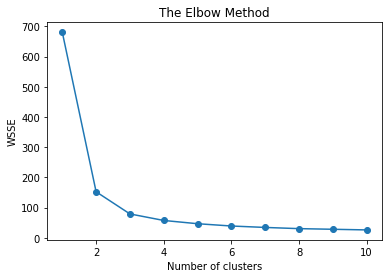

In [12]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = [] #creating an empty list to store the WSSE for different values of K
for k in range(1, 11): #create a range for k=1 to 10 to build 10 different Kmeans model in the for loop
    kmeans = KMeans(n_clusters = k,  random_state = 10) #creating a model object to indicate what should be the k value
    kmeans.fit(X) #train the model upon the X data and group the data into k clusters
    wsse.append(kmeans.inertia_) #find out and append the WSSE at given k value to the empty list created above
plt.plot(range(1, 11), wsse)
plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()
# Since the last elbow point is k=5 , 5 is the optimum value for k.


In above elbow curve method the the curve gets bend at 3 and remains constant given the change in wsse value. At point 3 it shows the changes is much larger than the ones after 3.

So we select, 3 as the number of clusters for the model.

In [13]:
print(wsse)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803, 25.996554473304478]


In [14]:
# Model Building
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 3, random_state= 10)
Y_pred = kmeans.fit_predict(X)

In [15]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [16]:
#Creating new variable in data frame to store predicted values 
iris_df["Clusters"]=Y_pred
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [17]:
#Mapping the predicted results with actual name of species given in the dataset

iris_df.Clusters=iris_df.Clusters.map({0:"Iris-versicolour", 1:"Iris-setosa",2:"Iris-virginica"})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


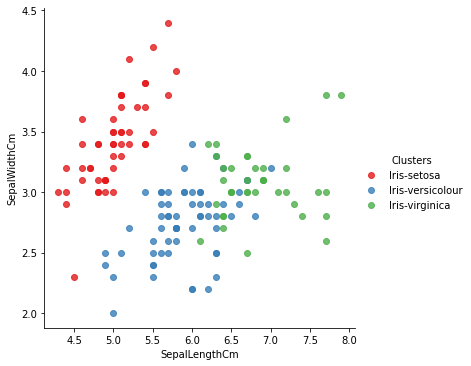

In [18]:
# Scatter plot 
sns.lmplot( data=iris_df, x="SepalLengthCm", y="SepalWidthCm",
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  

plt.show()


In [19]:
print(list(zip(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])))

[(5.901612903225806, 2.7483870967741932), (5.006, 3.418), (6.85, 3.0736842105263156)]


# THANK YOU!